<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/InformeTSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe sobre los algoritmos greedy y búsqueda local del problema TSP

## 1. Descripción del problema
El problema TSP es un problema de optimización combinatoria, o sea que busca la solución más óptima de todas las combinaciones posibles. Para este problema lo que queremos obtener es la ruta más corta desde un nodo inicial, recorrer cada nodo una sola vez y al terminar la ruta volver al nodo inicial.

### **Problema TSP**:
**Entrada**: Grafo completo no dirigido $G = (V,E)$ y que cada arco tenga un valor real $C_e$ para cada arco $e ∈ E$.

**Salida**: Un tour $T ⊆ E$ de $G$ con la mínima suma posible $∑_{e∈T}C_e$ de costo de arcos.

Este problema es conocido, resolverlo en tiempo polinomial refutaría la conjetura y comprobaría que $P = NP$.

Para calcular de manera correcta cuál es el tour $T$ más corto posible tendremos que calcularlo para todas las rutas posibles que en total son $n!$, siendo $n$ la cantidad de nodos por esto queremos buscar otras formas de resolver este problema y tenemos dos alternativas, por un lado, un algoritmo con el paradigma de la elección greedy y otra de búsqueda local utilizando la funcion 2-change, ambos algoritmos calculan el tour $T$ sin tener en cuenta a todas las rutas posibles de hecho el algoritmo greedy solo calcula una sola ruta, mientras que la búsqueda local los busca a través de una solución inicial modificándola para ver si un intercambio de rutas entre cuatro nodos pueda acortar el coste del tour. Los tours dados por ambos algoritmos son válidos, pero en ninguno de los dos casos podemos asegurar que el resultado obtenido es la mejor solución posible.

## 2. Descripción del algoritmo Greedy
El algoritmo greedy es un algoritmo que calcula la ruta a través de un nodo inicial elegido al azar, el algoritmo une cada nodo con elección greed. La elección greedy en este algoritmo será en el momento donde tenemos que elegir un camino a partir de un nodo, se elegirá el camino con el arco más corto siempre y cuando el nodo al que se llegue no haya sido visitado anteriormente, con esto construiremos un Tour $T$ y una vez terminado este tour será lo que retornaremos. Como uno puede intuir este algoritmo solo calcula una sola ruta y esta misma ruta es la que retorna y por esto no podemos asegurar que nuestra solución es la mejor de todas, pero eso no quita que sea una solución válida.

### 2.1 Pasos del algoritmo greedy
+ Crear una lista vacía para guardar los nodos visitados y otra para guardar la lista creada.
+ Elegir un nodo al azar y colocar como el nodo inicial en la ruta.
+ Mientras existan nodos sin visitar:
>+ Elegiremos el nodo que contenga el arco más cercano al nodo actual 
>+ Añadiremos el nodo a la lista de los nodos visitados
>+ Ahora elegiremos el nodo elegido como el nuevo nodo actual
+ Volvemos al nodo inicial
+ Retornamos la ruta actual

### 2.2 Ejemplo de TSP con el algoritmo greedy
Tenemos el siguiente grafo y utilizaremos el nodo $a$ como nodo inicial:

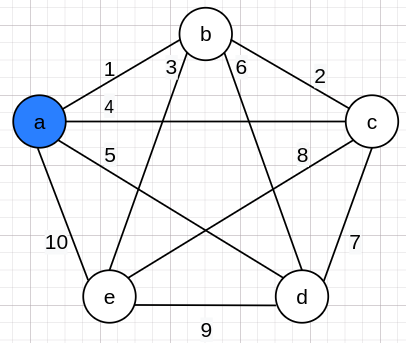

Los nodos coloreados son los nodos agregados a la lista de nodos visitados. Por lo que empezamos a realizar el algoritmo.

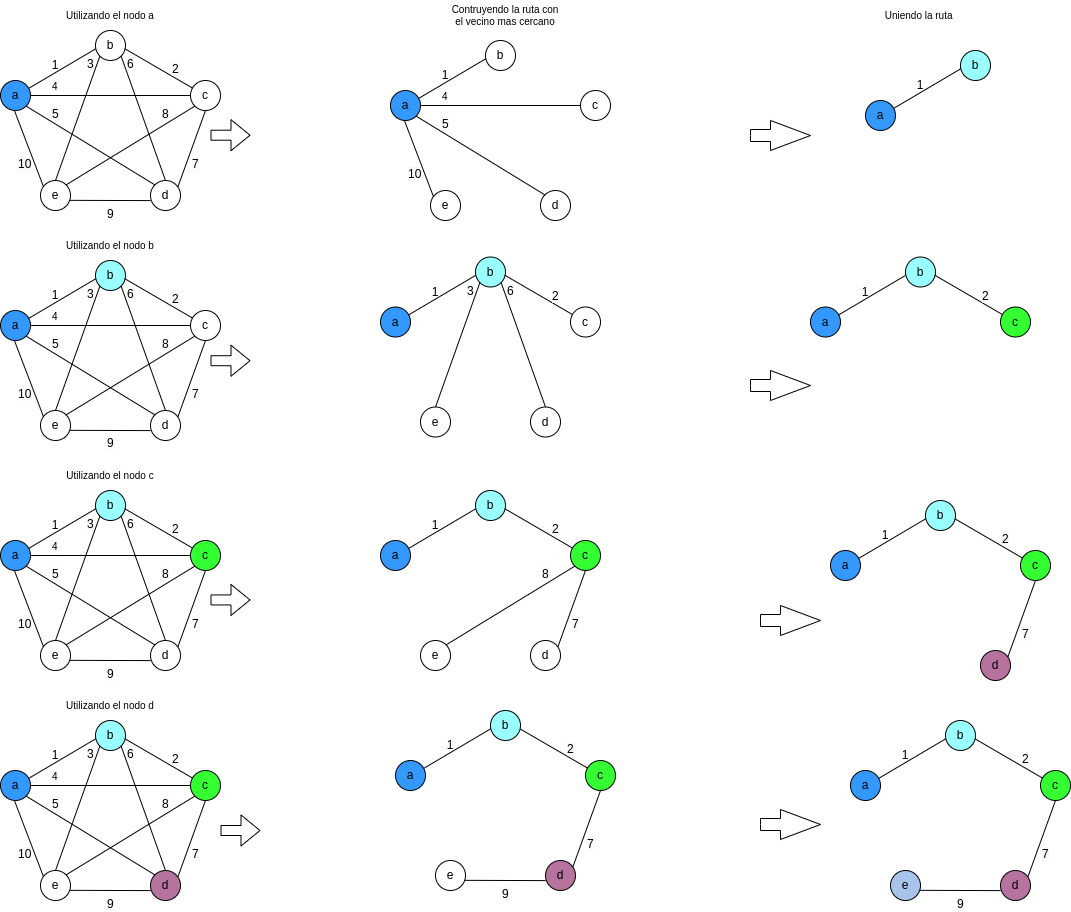

Aquí vemos como a partir del nodo $a$ se va construyendo la ruta buscando al vecino más cercano y las opciones de qué nodo elegir también se reducen al ir añadiendo los nodos ya visitados a la lista.

Una vez visitadas todos los nodos, cerraremos la ruta uniendo el último nodo agregado al nodo inicial y a eso también sumar el arco agregado:

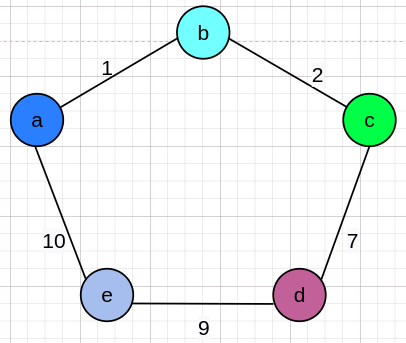

La ruta calculada a partir del arco $a$ como el inicial es:

+ Ruta: $[a,b,c,d,e]$
+ El coste de la ruta: 29

Finalizando el algoritmo.

## 3. Descripción del algoritmo de búsqueda local (2-OPT)
El algoritmo 2-OPT construye una solucion inicial, despues utiliza la funcion 2-change para encontrar una mejor solucion a partir de la solucion inicial

### 3.1 2-change
A partir de un tour $T$ propuesto tomaremos cuatro nodos e intercambiaremos sus caminos, esto con el objetivo de saber que realizando este cambio el coste de la ruta podría disminuir.

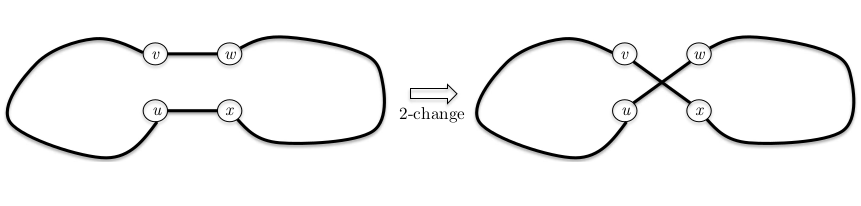

**2-Change**:
+ Tomaremos el tour $T$, removeremos dos arcos $(v,w),(u,x)$ de $T$ que no comparte un punto final
+ Agregue los arcos $(v,x)$ y $(u,w)$ o los arcos $(u,v)$ y $(w,x)$, cualquiera que sea el par conduce a un nuevo tour $T'$.

El primer paso elige dos arcos con cuatro puntos finales distintos. Ahí hay tres maneras diferentes de emparejar estos cuatro nodos, pero una de ellas crea un nuevo recorrido (como en la figura anterior). El tercer emparejamiento genera dos ciclos disjuntos en lugar de un recorrido factible.

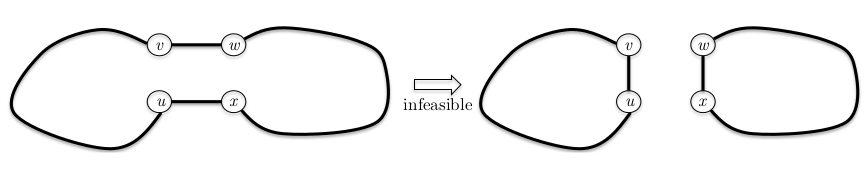

El 2-change puede crear un tour que es mejor o peor que el original. Si los arcos recien intercambiados son $(u,w)$ y $(v,x)$:

$$C_d = (C_{vw}+C_{ux})-(C_{uw}+C_{vx})$$

$C_d$ representa lo que decreció el coste del nuevo tour $T'$ creado a partir del 2-change y se calcula restando el valor de los arcos del tour original removidos por el 2-change $(C_{vw}+C_{ux})$ menos los valores de los arcos agregados por el 2-change $(C_{uw}+C_{vx})$.

Si $C_d$ es positiva, entonces el beneficio $(C_{vw} + C_{ux})$ de quitar los arcos viejos supera el costo $(C_{uw} + C_{vx})$ de agregar los nuevos. El 2-change produce un tour T'$ $de menor costo, por lo que encontramos una mejor solución que la anterior propuesta.

En caso de que $C_d$ sea negativa, significa que 2-change produjo una solución peor a la solución original.

### 3.2 Pasos del algoritmo 2-OPT
+  Encontrar una solucion inicial $T$, en este caso la solucion inicial sera  una ruta valida hecha al azar.
+ Mientras aun se pueda mejorar con 2-change, $(u,w),(u,x) ∈ T$ exista hacer:
>+ $T:= 2change(T,(u,w),(u,x))$
+ Retornar $T$

Lo que quiere decir la parte 2 es que al momento de aplicarle la función de 2change al tour $T$ para cada nodo $∈ T$, nos quedaremos con la mejor ruta que nos ha dado la función 2change. Esto se repetirá hasta que aun probando con todos los nodos no se ha encontrado ninguna ruta más barata posible, por lo que se sale del while y se retorna la ruta que se consiguió encontrar otra mejor ruta.

### 3.3 Ejemplo de un algoritmo 2-OPT

Utilizando el mismo grafo que el del problema greedy y una solución propuesta para poder comparar:

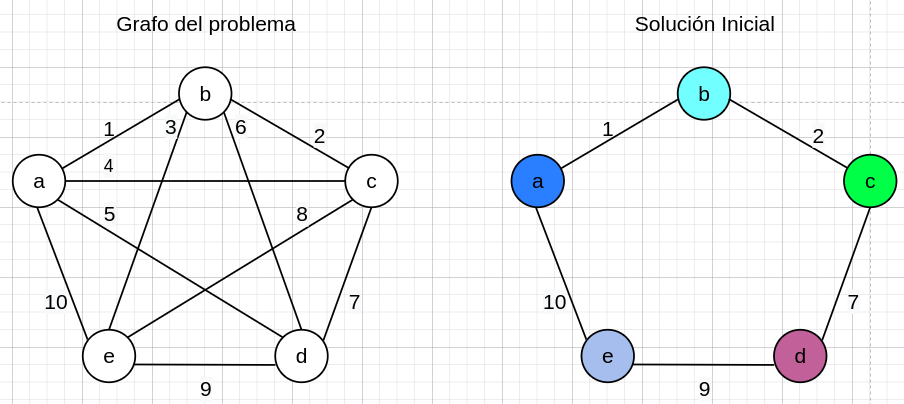

A partir de la solución inicial probaremos cada combinación e iremos guardando el que nos el menor coste:

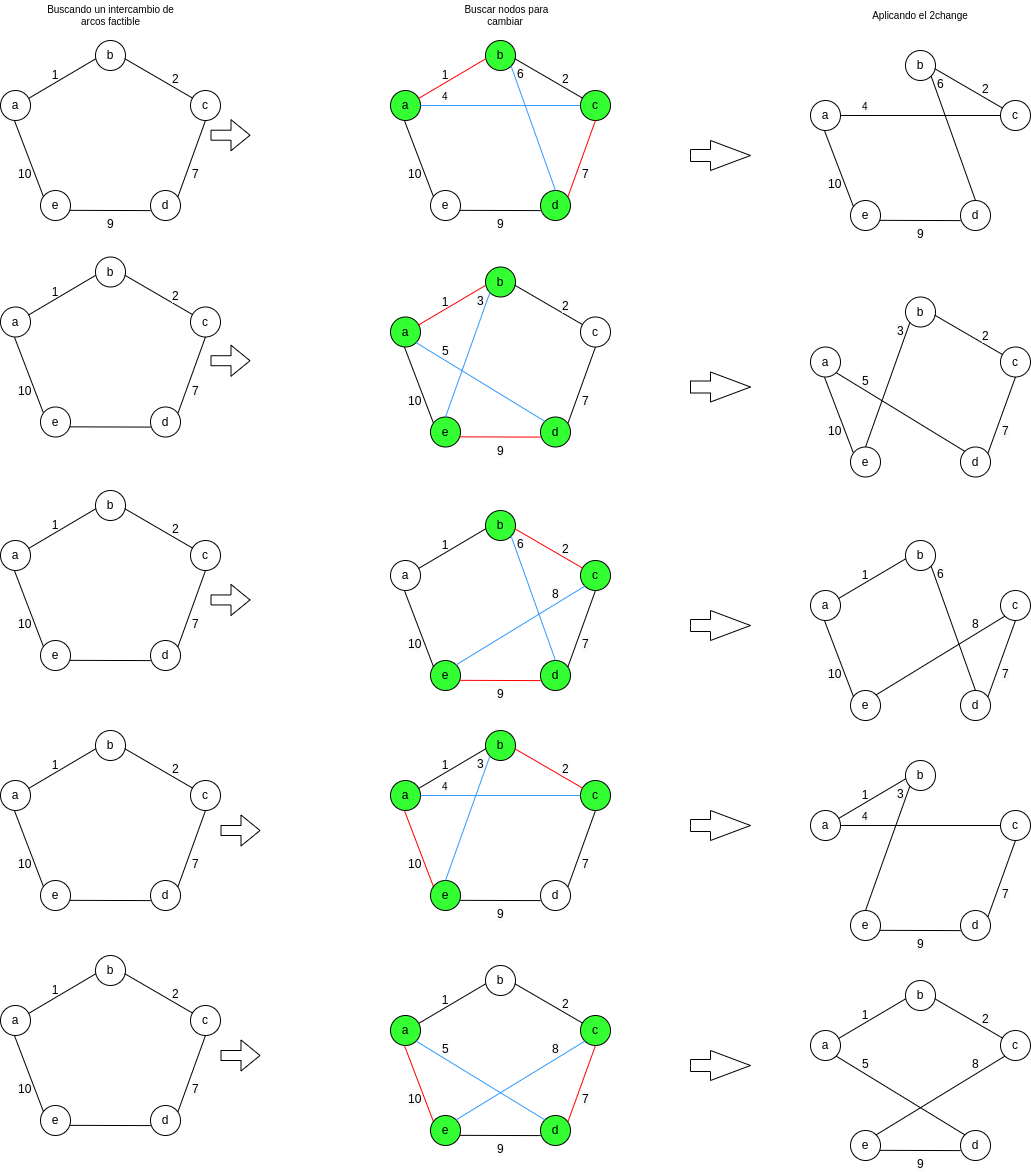

Cada vez que calculemos una posible ruta con 2change veremos si tiene menor valor que el coste de la solución inicial y lo guardaremos:

Valor de la ruta inicial: 29 (Veremos el valor de las rutas calculadas desde arriba hacia abajo).

+ Valor de la ruta 1: 31 (Es mayor, así que no se guarda)
+ Valor de la ruta 2: 27 (Es menor que el de la ruta inicial, por lo que la ruta se guarda y su coste también)
+ Valor de la ruta 3: 32 (Es mayor, así que no se guarda)
+ Valor de la ruta 4: 24 (Es menor que el de la ruta 2, por lo que se guarda la ruta y su coste)
+ Valor de la ruta 5: 25 (Es mayor, así que no se guarda)

La ruta de menor coste es el de la ruta 4 de valor 24, por lo que esta ruta es la que se retorna.

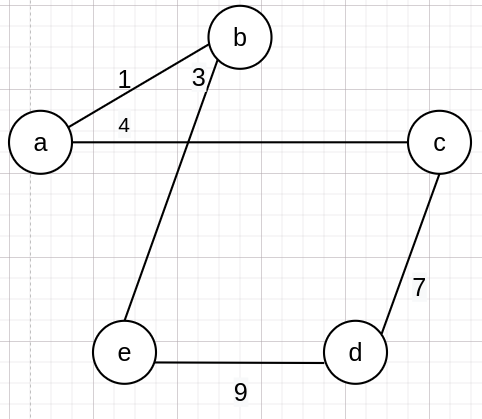

## 4. Implementación en Python
Funciones auxiliares para las implementaciones:

In [9]:
from random import randint
import numpy as np

#Funcion para crear una ruta con numero al azar sin que se repita ningun numero
def rutaRandom(n):
    listado = [i for i in range(n)]
    longitud_lista = len(listado)
    for i in range(longitud_lista):
        indice_aleatorio = random.randint(0, longitud_lista - 1)
        temporal = listado[i]
        listado[i] = listado[indice_aleatorio]
        listado[indice_aleatorio] = temporal
    return listado

#Creador de instancias con 0's
def instancias(n):
    cost_mat = np.random.randint(100, size=(n, n))
    cost_mat += cost_mat.T
    np.fill_diagonal(cost_mat, 0)
    cost_mat = list(cost_mat)
    return cost_mat

#Creador de instancias con -1's
def instancias2(n):
    cost_mat = np.random.randint(100, size=(n, n))
    cost_mat += cost_mat.T
    np.fill_diagonal(cost_mat, -1)
    cost_mat = list(cost_mat)
    return cost_mat

#Calcula el C_d descrito dentro del algoritmo de busqueda local
def cost_change(cost_mat, n1, n2, n3, n4):
    return cost_mat[n1][n3] + cost_mat[n2][n4] - cost_mat[n1][n2] - cost_mat[n3][n4]

#Calcula el coste de una ruta: (Esta es para calcular el resultado del 2-OPT)
def cost(cost_mat, route):
    suma = 0
    for i in range(len(route)):
        if i == len(route)-1:
           suma += cost_mat[0][route[len(route)-1]]

        else:
            suma += cost_mat[route[i]][route[i+1]]

    return suma  

### 4.1 Implementación del algoritmo 2-OPT

In [ ]:
#Funcion para el algoritmo busqueda lineal con 2-change
def two_opt(cost_mat, verbose = False):

    #Crea una solucion con una ruta al azar
    best = rutaRandom(len(cost_mat))
    suma = cost(cost_mat,best)

    if verbose:
        print("-----------------Inicio del algoritmo-----------------\n")
        print("Primero creamos una solución inicial con una ruta al azar.")
        print("Ruta creada :", str(best),"")
        print("Suma de la ruta creada al azar:",suma,"\n")
        costo = 0
    
    #Esto comprueba si se encontro una mejor solucion o no
    improved = True
    
    if verbose:
        print("Ahora a entrar al ciclo while para utilizar la función 2change")
        print("improved :", improved)

    #Si se encontro una mejor solucion se vuelve a buscar otro mejor
    #Si no se encuentra una mejor solucion, retorna la ruta
    while improved:
        improved = False
        
        if verbose:
            print("\nComprobaremos cada combinación")
            print("Desde i:",1," hasta",len(best)-2)
            
        #Comprueba cada combinacion de nodos
        for i in range(1, len(best) - 2):

            if verbose:
                    print("   Desde j:",i+1,"hasta", len(best),"\n")

            for j in range(i + 1, len(best)):

                if verbose:
                    print("Si i:",i," -  j:",j, "= 1  Continua a la siguiente iteración\n")

                #Si es el mismo nodo no ocurre nada
                if j - i == 1: continue

                if verbose:
                    costo = cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j])
                    print("Decrecimiento del costo de la ruta :",costo)
                    if costo > 0:
                        print("Si el decrecimiento es positivo implica que si hacemos ese intercambio")
                        print("el coste de la ruta subirá por lo que no nos conviene realizar 2charge\n")
                    else:
                        print("Si el decrecimiento es menor a 0 entonces encontramos una ruta mejor") 

                #Calcular el C_d, si es negativo se guarda el intercambio y
                #se actualiza la mejor ruta a la ruta recien calculada
                if cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j]) < 0:
                    
                    if verbose:
                        print("Actualizaremos la mejor ruta con 2charge")
                        print("Mejor ruta antes :",str(best))
                    
                    best[i:j] = best[j - 1:i - 1:-1]
                    suma -= cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j])
                    if verbose:
                        print("Mejor ruta actual:",str(best),"\n")
                    
                    improved = True
        
        if improved == False and verbose:
            print("\nNo se encontró una ruta mejor por lo que salimos del while")

        #Se guarda la mejor ruta actual en esta variable            
    
    if verbose:
        print("\nRetornamos la mejor ruta encontrada:",str(best))
        print("Retornamos igualmente la suma de la ruta:",suma)

    #Se retorna la mejor ruta
    return best,suma

### Ejemplo de la Implementación

In [ ]:
cost_mat = instancias(5)
print("Distancias entre los nodos: (El 0 es porque un nodo no tiene una distancia con el propio nodo)")
for i in range(len(cost_mat)):
    print("Nodo:",i," distancias con otros nodos:",str(cost_mat[i]))
ruta,suma = two_opt(cost_mat)
print("\nRuta calculada con busqueda local:",ruta)
print("Suma de la ruta calculada:",suma)

Distancias entre los nodos: (El 0 es porque un nodo no tiene una distancia con el propio nodo)
Nodo: 0  distancias con otros nodos: [  0  89 180 149  46]
Nodo: 1  distancias con otros nodos: [ 89   0  67 102 116]
Nodo: 2  distancias con otros nodos: [180  67   0 121 160]
Nodo: 3  distancias con otros nodos: [149 102 121   0 120]
Nodo: 4  distancias con otros nodos: [ 46 116 160 120   0]

Ruta calculada con busqueda local: [3, 4, 0, 2, 1]
Suma de la ruta calculada: 502


### Ejemplo de la Implementación con verbose

In [ ]:
cost_mat = instancias(5)
ruta,suma = two_opt(cost_mat, verbose = True)

-----------------Inicio del algoritmo-----------------

Primero creamos una solución inicial con una ruta al azar.
Ruta creada : [2, 1, 3, 4, 0] 
Suma de la ruta creada al azar: 421 

Ahora a entrar al ciclo while para utilizar la función 2change
improved : True

Comprobaremos cada combinación
Desde i: 1  hasta 3
   Desde j: 2 hasta 5 

Si i: 1  -  j: 2 = 1  Continua a la siguiente iteración

Si i: 1  -  j: 3 = 1  Continua a la siguiente iteración

Decrecimiento del costo de la ruta : -98
Si el decrecimiento es menor a 0 entonces encontramos una ruta mejor
Actualizaremos la mejor ruta con 2charge
Mejor ruta antes : [2, 1, 3, 4, 0]
Mejor ruta actual: [2, 3, 1, 4, 0] 

Si i: 1  -  j: 4 = 1  Continua a la siguiente iteración

Decrecimiento del costo de la ruta : 64
Si el decrecimiento es positivo implica que si hacemos ese intercambio
el coste de la ruta subirá por lo que no nos conviene realizar 2charge

   Desde j: 3 hasta 5 

Si i: 2  -  j: 3 = 1  Continua a la siguiente iteración

Si 

### 4.2 Implementación del algoritmo greedy

In [ ]:
INT_MAX = 2147483647

#Funcion del algoritmo greedy
def findMinRoute(tsp, verbose = False):

    #Inicializamos las variables
    sum = 0
    counter = 1
    j = 0
    min = INT_MAX
    visitedRouteList = [0] * len(tsp)

    #Empezaremos por un numero random
    # lo agregamos a los nodos visitados y a la ruta
    numero = randint(0,len(tsp)-1)
    visitedRouteList[numero] = 1
    route = [0] * len(tsp)
    route[0] = numero
    i = numero

    if verbose:
        print("-----------------Inicio del algoritmo-----------------\n")
        print("Primero inicializamos las variables que utilizaremos")
        print("sum:",sum)
        print("contador:",counter)
        print("j:",j)
        print("min:",min)
        print("\nLuego elegimos un número al azar entre 0 y el tamaño tsp - 1")
        print("Número al azar elegido:",numero)
        print("Lo añadimos a la lista de nodos visitados y a la ruta solución")
        print("Lista de nodos visitados:",str(visitedRouteList))
        print("Ruta solución:",str(route),"\n")
        print("empezaremos a crear la ruta a partir del número al azar que hemos tomado, i:",i)
        print("\n-----------------i:",i,"-----------------\n")


    #Matriz tsp[][] n x n
    #Osea i y j no pueden ser mas grandes que n, siendo n el tamaño de la matriz
    while i < len(tsp) and j < len(tsp[i]):

        if verbose and counter >= len(tsp[i]) - 1:
            print("\nComo counter(",counter,") es mayor o igual al tamaño tsp-1(",len(tsp[i]) - 1,")")
            print("Hemos temrinado con el ciclo while")
            print("----------------------------------\n")

        # Verificar si ya hemos hecho las suficientes iteraciones
        if counter >= len(tsp[i]) - 1:break

        # Si el camino no fue visitado 
        #y el coste es menor que el coste menor actual
        # actualizaremos el coste y la ruta
        if verbose:
            print("Primero, i y j no tiene que coincidir porque indica que son el mismo nodo")
            print("i:",i," y","j:",j)
            if j == i:
                print("Son iguales, no se realiza ningún cambio\n\n")
            else:
                print("Como son distintas veremos si ya fueron visitados")
                print("visitedRouteList[j] ==",visitedRouteList[j],"¿Es igual a 0?")
                if visitedRouteList[j] != 0:
                    print("Es distinto por lo que no se realiza ningún cambio\n\n")
                else:
                    print("Nos falta la última condición")
                    print("Si el arco entre",i,"y",j,"es menor al arco menor guardado min:",min)
                    if tsp[i][j] >= min:
                       print("No es estrictamente menor por lo que no se realiza ningún cambio\n\n")

        if j != i and (visitedRouteList[j] == 0):
            if tsp[i][j] < min:
                min = tsp[i][j]
                route[counter] = j
                if verbose:
                    print("Como todo lo anterior se cumple, se actualiza los valores")
                    print("El arco menor es ahora entre los nodos",i,"y",j,":",tsp[i][j])
                    print("Se agrega momentáneamente a la ruta el nodo:",j,)
                    print("La ruta por ahora:",str(route))
        
        if verbose:
            print("\nSe le suma 1 a j")
            print("----------------------------------\n")
        j += 1

        # Una vez visto todos los caminos
        # Añadir definitvamente el camino a la ruta y reinicar las variables
        if j == len(tsp[i]):
            sum += min
            min = INT_MAX
            visitedRouteList[route[counter]] = 1
            j = 0
            i = route[counter]
            counter += 1
            
            if verbose:
                print("Una vez recorrida todos los arcos del nodo, se actualizan los valores")
                print("Se agrega a la suma el menor arco encontrado:",sum)
                print("Se reinicia el valor del menor arco encontrado min:",min)
                print("Se actualiza la lista de nodos visitados:",str(visitedRouteList))
                print("Se reinicia j:",j)
                print("Se actualiza i:",i)
                print("el contador se suma +1")
                print("\n-----------------i:",i,"-----------------\n")


    # Una vez salido del while falta agregar el ultimo nodo
    # Se agrega el unico nodo sin visitar aun y se suma sus arcos
    for i in range(len(visitedRouteList)):
        if visitedRouteList[i] == 0:
            route[len(route)-1] = i
            j = route[len(route)-2]
            sum += tsp[i][route[0]]
            sum += tsp[j][i]

            if verbose:
                print("Una vez salido del while nos falta agregar el último nodo a la ruta")
                print("Por eso agregaremos el único nodo no visitado que es el nodo:",i)
                print("y agregamos a la suma sus dos arcos faltantes por suma")
                print("El arco entre el último nodo hasta el primer nodo")
                print("El arco entre el penúltimo nodo hasta el último nodo")
                print("Finalmente tenemos listo la suma total de la ruta y la ruta.")

            break
    
    #Termina el algoritmo
    if verbose:
        print("Ruta final:",str(route))
        print("Suma de la ruta:",sum)

    return sum, route

### Ejemplo de la Implementación

In [ ]:
cost_mat = instancias2(5)
print("Distancias entre los nodos: (El -1 es porque un nodo no tiene una distancia con el propio nodo)")
for i in range(len(cost_mat)):
    print("Nodo:",i," distancias con otros nodos:",str(cost_mat[i]))
suma,ruta = findMinRoute(cost_mat)
print("\nRuta calculada con eleccion greedy :",ruta)
print("Suma de la ruta:",suma)

Distancias entre los nodos: (El -1 es porque un nodo no tiene una distancia con el propio nodo)
Nodo: 0  distancias con otros nodos: [ -1  97  38  80 107]
Nodo: 1  distancias con otros nodos: [ 97  -1  97 106 163]
Nodo: 2  distancias con otros nodos: [ 38  97  -1  25 171]
Nodo: 3  distancias con otros nodos: [ 80 106  25  -1 168]
Nodo: 4  distancias con otros nodos: [107 163 171 168  -1]

Ruta calculada con eleccion greedy : [3, 2, 0, 1, 4]
Suma de la ruta: 491


### Ejemplo de la Implementación con verbose

In [ ]:
cost_mat2 = instancias2(5)
suma,ruta = findMinRoute(cost_mat2,verbose = True)

-----------------Inicio del algoritmo-----------------

Primero inicializamos las variables que utilizaremos
sum: 0
contador: 1
j: 0
min: 2147483647

Luego elegimos un número al azar entre 0 y el tamaño tsp - 1
Número al azar elegido: 4
Lo añadimos a la lista de nodos visitados y a la ruta solución
Lista de nodos visitados: [0, 0, 0, 0, 1]
Ruta solución: [4, 0, 0, 0, 0] 

empezaremos a crear la ruta a partir del número al azar que hemos tomado, i: 4

-----------------i: 4 -----------------

Primero, i y j no tiene que coincidir porque indica que son el mismo nodo
i: 4  y j: 0
Como son distintas veremos si ya fueron visitados
visitedRouteList[j] == 0 ¿Es igual a 0?
Nos falta la última condición
Si el arco entre 4 y 0 es menor al arco menor guardado min: 2147483647
Como todo lo anterior se cumple, se actualiza los valores
El arco menor es ahora entre los nodos 4 y 0 : 120
Se agrega momentáneamente a la ruta el nodo: 0
La ruta por ahora: [4, 0, 0, 0, 0]

Se le suma 1 a j
-----------------

## 5. Tiempo de ejecución

## 5.1 Tiempo de ejecución del algoritmo greedy
Para analizar el tiempo de ejecución utilizaremos la implementación utilizada:

```
def findMinRoute(tsp, verbose = False):
    //Iniciacion de variables
    //Elegir un numero al azar para poder comenzar
    
    //Primera parte
    while i < len(tsp) and j < len(tsp[i]):

        if counter >= len(tsp[i]) - 1:break

        if j != i and (visitedRouteList[j] == 0):
            if tsp[i][j] < min:
                min = tsp[i][j]
                route[counter] = j
        
        j += 1

        if j == len(tsp[i]):
            sum += min
            min = INT_MAX
            visitedRouteList[route[counter]] = 1
            j = 0
            i = route[counter]
            counter += 1
    
    //Segunda parte
    for i in range(len(visitedRouteList)):
        if visitedRouteList[i] == 0:
            route[len(route)-1] = i
            j = route[len(route)-2]
            sum += tsp[i][route[0]]
            sum += tsp[j][i]
            break
    
    return sum, route
```

En la **primera parte** iremos viendo cada arco de un nodo $i$ y buscar el arco de menor valor que lo conecta con un nodo aún no visitado $j$, los valores que $i$ toma son $V-1$ siendo $V$ la cantidad de nodos, por cada nodo $i$ recorres $V$ nodos que es la variable $j$,por lo que para la primera parte tenemos lo siguiente:

Por cada $i$ se recorrerá $j$ nodos, buscando el arco de menor coste sin que el nodo de destino haya sido visitado previamente, debido a que recorremos la matriz [  ][  ] entera, esto tiene complejidad $O(V^2)$.

En la **segunda parte** iremos viendo los nodos visitados buscando a por el único nodo que aún no es visitado para añadirlo a la ruta y sumar los arcos restantes.

Como recorremos una lista de $V$ nodos, esto tiene complejidad $O(V)$.

El **tiempo de ejecución** sería entonces (1era parte + 2da parte): $O(V^2)+O(V)=O(V^2)$.

### Complejidad espacial
En esta implementación tendremos la lista de nodos visitados de tamaño $V$ que guarda todos los nodos y si lo hemos visitado o no, como el resto, son variables constantes, tenemos que la complejidad espacial de este algoritmo es $O(V)$.

### 5.2 Tiempo de ejecución del algoritmo búsqueda local
Para analizar el tiempo de ejecución utilizaremos la implementación utilizada:

```
def two_opt(cost_mat, verbose = False):

    //Primera Parte
    best = rutaRandom(len(cost_mat))
    suma = cost(cost_mat,best)
    improved = True
    
    //Segunda Parte
    while improved:
        improved = False
        
        for i in range(1, len(best) - 2):
            for j in range(i + 1, len(best)):

                if j - i == 1: continue

                if cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j]) < 0:
                    
                    best[i:j] = best[j - 1:i - 1:-1]
                    suma -= cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j])                   
                    improved = True
         
    
    return best,suma
```



En la **primera parte** tendremos una función que nos da una solucion inicial con una ruta hecha al azar siendo esta la función:
```
def rutaRandom(n):
    listado = [i for i in range(n)]
    longitud_lista = len(listado)
    for i in range(longitud_lista):
        indice_aleatorio = random.randint(0, longitud_lista - 1)
        temporal = listado[i]
        listado[i] = listado[indice_aleatorio]
        listado[indice_aleatorio] = temporal
    return listado
```
Esta función nos crea una lista de tamaño $V$, creando primero una lista ordenada y después aplicando índices aleatorios intercambia las posiciones de los elementos de la lista, por esto la complejidad de esta función es de $O(V)$ con $V$ la cantidad de nodos del grafo.
```
def cost(cost_mat, route):
    suma = 0
    for i in range(len(route)):
        if i == len(route)-1:
           suma += cost_mat[0][route[len(route)-1]]

        else:
            suma += cost_mat[route[i]][route[i+1]]

    return suma  
```
Por otro lado, tendremos una función que retorna la suma total de una ruta dada, en este caso recorreremos el tamaño de la ruta ($V$) e iremos sumando los arcos que conectan con los nodos ayudándonos de la matriz $[V][V]$ que contiene las distancias entre los nodos, esta función tiene complejidad $O(V)$.

La complejidad de la **primera parte** es $O(V)+O(V)→O(2V)=O(V)$.

En la **segunda parte** tenemos un ciclo while que contiene dos ciclos for, estos ciclos for se encargan de recorrer los nodos e ir comparando sus costes para verificar si haremos o no 2change con esos nodos, el cálculo del coste es este:

```
def cost_change(cost_mat, n1, n2, n3, n4):
    return cost_mat[n1][n3] + cost_mat[n2][n4] - cost_mat[n1][n2] - cost_mat[n3][n4]
```
Como se puede ver tiene complejidad constante, por lo que tendremos que enfocarnos en los dos ciclos for:

```
for i in range(1, len(route) - 2):
    for j in range(i + 1, len(route)):
```

El primer for no recorre todos los nodos, el primer for se encarga de obtener los nodos $i$ e $i-1$ mientras que el segundo for recorre los nodos siguientes probando todos los duos de nodos posibles una vez probado todos, $i$ toma los siguientes dos nodos y $j$ vuelve a recorrer los nodos siguientes a ellos dentro de la ruta, siempre utilizando el 2change para los nodos cuyo costo de cambio produzca un valor negativo si eso pasa actualizamos a la nueva mejor ruta con 2change.

Cuando encontramos una mejor ruta que la ruta obtenida anteriormente el while se encarga de volver a realizar los ciclos for y esto siempre se repetirá hasta que los ciclos for no encuentren otra mejor ruta y para ese caso nos saldremos del while.

viendo que la idea de los ciclos for es recorrer los nodos, para definir las distancias entre nodos utilizamos una matriz $[V][V]$ con $V$ la cantidad de nodos para los ciclos for tendremos como compleijdad $O(V^2)$.

Combinando el while con los ciclos for veremos que repetiremos estos ciclos for hasta que no encontremos otra mejor ruta, así que definiremos que $k∈\mathbb N$ es la cantidad de veces que repetiremos el ciclo for así que combinando todo tendremos que la **segunda parte** tiene complejidad $O(k*V^2)$.

Finalmente, vemos que la **complejidad de este algoritmo** es (1era parte + 2da parte)→$O(k*V^2)+O(V)=O(V^2)$, $k$ no entra porque es un número $\mathbb N$.